# Pregled in napovedovanje rezultatov tekem Angleške Premier Lige
## Uvod in predstavitev projekta

Najbolj priljubljen in razvit šport na svetu je nogomet, angleška premier liga pa je verjetno najbolj konkurenčna in zato logična izbira za preučevanje. Nogomet se nenehno razvija, pravila igre se spreminjajo, prav tako se spreminjajo ekipe in njihov način igre.

Osebno težko določimo zmagovalca tekme, ponavadi napovedujemo rezultate glede na trenutno formo ekipe in igralcev ter njihove pretekle dosežke.
Za boljše napovedovanje nam lahko pomaga strojno učenje.

V tem projektu sem preučil uporabo statističnih metod in strojnega učenja z namenom napovedovanja končnega zmagovalca nogometne tekme na podlagi zgodovinskih podatkov ekip. Projekt je sestavljen iz pred-procesiranja podatkovne množice, analize zgodovinskih podatkov, izvedbe metod strojnega učenja in analize rezultatov.

## Problem
Napovedovanje rezultatov je zahtevno. Določiti je potrebno, katere parametre bomo uporabili, kakšno podatkovno množico bomo izbrali ter kako časovno dolgo obdobje prvenstva bomo preučevali.

## Podatkovna množica
Rezultate tekem sem pridobil s strani kaggle English Premier League (EPL) Results
(https://www.kaggle.com/datasets/irkaal/english-premier-league-results?select=EPL.csv).

V množici so zbrani rezultati sezone 1993-94 do 2021-22. Odločil sem se, da bom uporabil množico po letu 2000, od sezone 2000-2001 naprej. To je obdobje modernega nogometa in najboljše obdobje angleške Premier lige. Za primerjavo bom uporabil tudi manjšo množico tekem preteklih treh sezon. Zanima me primerjava časovnega razpona in točnosti napovedovanja.

Manjša podatkovna množica je zanimiva tudi z vidika novih nogometnih pravil, časa korona-virusa, VAR-a in vzpona tržne vrednosti angleških nogometašev, posledično se je v zadnjih letih pojavilo splošno mnenje, da je angleška liga ponovno najboljša na svetu. Za naš projekt je to zanimivo zaradi povečanja konkurenčnosti ekip ter majhni razliki v kvaliteti.

<b>Seznam in opis stolpcev podatkovne množice:</b>

Season - Match Season -> sezona
DateTime - Match Date and Time (yyyy-mm-dd hh:mm:ss) -> datum in čas tekme
HomeTeam - Home Team -> domača ekipa
AwayTeam - Away Team -> gostujoča ekipa
FTHG - Full Time Home Team Goals -> goli na tekmi domače ekipe
FTAG - Full Time Away Team Goals IZLOČI -> goli na tekmi gostujoče ekipe
FTR - Full Time Result (H=Home Win, D=Draw, A=Away Win) -> rezultat tekme
HTHG - Half Time Home Team Goals -> goli ob polčasu domače ekipe
HTAG - Half Time Away Team Goals -> goli ob polčasu gostujoče ekipe
HTR - Half Time Result (H=Home Win, D=Draw, A=Away Win) -> rezultat ob polčasu
Referee - Match Referee -> sodnik
HS - Home Team Shots -> streli domače ekipe
AS - Away Team Shots -> streli gostujoče ekipe
HST - Home Team Shots on Target -> streli domače ekipe v okvir vrat
AST - Away Team Shots on Target -> streli gostujoče ekipe v okvir vrat
HC - Home Team Corners -> koti domače ekipe
AC - Away Team Corners -> koti gostujoče ekipe
HF - Home Team Fouls Committed -> prekrški domače ekipe
AF - Away Team Fouls Committed -> prekrški gostujoče ekipe
HY - Home Team Yellow Cards -> rumeni kartoni domače ekipe
AY - Away Team Yellow Cards -> rumeni kartoni gostujoče ekipe
HR - Home Team Red Cards -> rdeči kartoni domače ekipe
AR - Away Team Red Cards -> rdeči kartoni gostujoče ekipe

## Pregled in pred-procesiranje podatkov
Množico preberemo s knjižnico pandas. Pregledamo osnovne značilnosti, obliko in število podatkov.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('results.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    8289 non-null   object
 1   DateTime  8289 non-null   object
 2   HomeTeam  8289 non-null   object
 3   AwayTeam  8289 non-null   object
 4   FTHG      8289 non-null   int64 
 5   FTAG      8289 non-null   int64 
 6   FTR       8289 non-null   object
 7   HTHG      8289 non-null   int64 
 8   HTAG      8289 non-null   int64 
 9   HTR       8289 non-null   object
 10  Referee   8289 non-null   object
 11  HS        8289 non-null   int64 
 12  AS        8289 non-null   int64 
 13  HST       8289 non-null   int64 
 14  AST       8289 non-null   int64 
 15  HC        8289 non-null   int64 
 16  AC        8289 non-null   int64 
 17  HF        8289 non-null   int64 
 18  AF        8289 non-null   int64 
 19  HY        8289 non-null   int64 
 20  AY        8289 non-null   int64 
 21  HR        8289

Pregled prvih 15 vrstic izbrane množice.

In [2]:
df.head(15)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
5,2000-01,2000-08-19T00:00:00Z,Leicester,Aston Villa,0,0,D,0,0,D,...,4,3,5,4,12,12,2,3,0,0
6,2000-01,2000-08-19T00:00:00Z,Liverpool,Bradford,1,0,H,0,0,D,...,10,2,6,1,8,8,1,1,0,0
7,2000-01,2000-08-19T00:00:00Z,Sunderland,Arsenal,1,0,H,0,0,D,...,2,7,2,9,10,21,3,1,0,1
8,2000-01,2000-08-19T00:00:00Z,Tottenham,Ipswich,3,1,H,2,1,H,...,6,5,3,4,14,13,0,0,0,0
9,2000-01,2000-08-20T00:00:00Z,Man United,Newcastle,2,0,H,1,0,H,...,9,6,7,1,7,13,0,1,0,0


Stolpec DateTime, ki predstavlja dan in čas tekme ni primeren za našo končno množico.
Iz njega si lahko sestavimo nove podatke, ki predstavljajo dan v tednu v katerem je bila tekma odigrana. V nogometu je to pomemben podatek. Dan lahko vpliva na formo ekipe in igralcev, če je ekipa igrala sredi tedna in bo ponovno igrala čez vikend. Nekatere ekipe imajo zelo obremenjujoč koledar tekem. Pri tem se zavedamo, da skoraj vse ekipe vzporedno igrajo še pokalno tekmovanje, najboljše pa še v ligi prvakov.

Večina tekem se igra v popoldanskem času v sobotah in nedeljah, ostale tekme pa med tednom zvečer.

In [3]:
match_date = pd.to_datetime(df['DateTime'], infer_datetime_format=True)
df['MatchDay'] = match_date.dt.day_name()

Napovedovali bomo stolpec FTR, končni rezultat tekme.
Končni rezultati so lahko domača ekipa zmaga, gostujoča ekipa zmaga, izenačeno. Rezultatom bom dodelil labele.

In [4]:
le = preprocessing.LabelEncoder()
df['FTR'] = le.fit_transform(df['FTR'])
FTR = df['FTR'].unique()
print('Če zmaga domača ekipa je label:', FTR[0])
print('Če zmaga gostujoča ekipa je label:', FTR[1])
print('Če je rezultat izenačen je label:', FTR[2])

Če zmaga domača ekipa je label: 2
Če zmaga gostujoča ekipa je label: 0
Če je rezultat izenačen je label: 1


Pregled ekip, ki so igrale v PL. V ligi nastopa 20 klubov, zadnji trije uvrščeni klubi so delegirani v angleško drugo ligo. Sezona poteka od avgusta do maja, v 38 krogih.

Opazimo, da se od leta 2000 v ligi zamenjalo veliko ekip. Od leta 2019 pa je liga večinoma standardna.

In [5]:
print('Število ekip, ki je od sezone 2000/2001 naprej zaigralo v PL:', len(df['HomeTeam'].unique()))
print('Število ekip, ki je od sezone 2019/2020 naprej zaigralo v PL:', len(df.loc[df['Season']>='2019-20']['HomeTeam'].unique()))

Število ekip, ki je od sezone 2000/2001 naprej zaigralo v PL: 44
Število ekip, ki je od sezone 2019/2020 naprej zaigralo v PL: 24


Vizualizacija največjih angleški prvoligašev. Razmerje med doseženimi goli po sezonah.

<AxesSubplot: xlabel='season', ylabel='goals'>

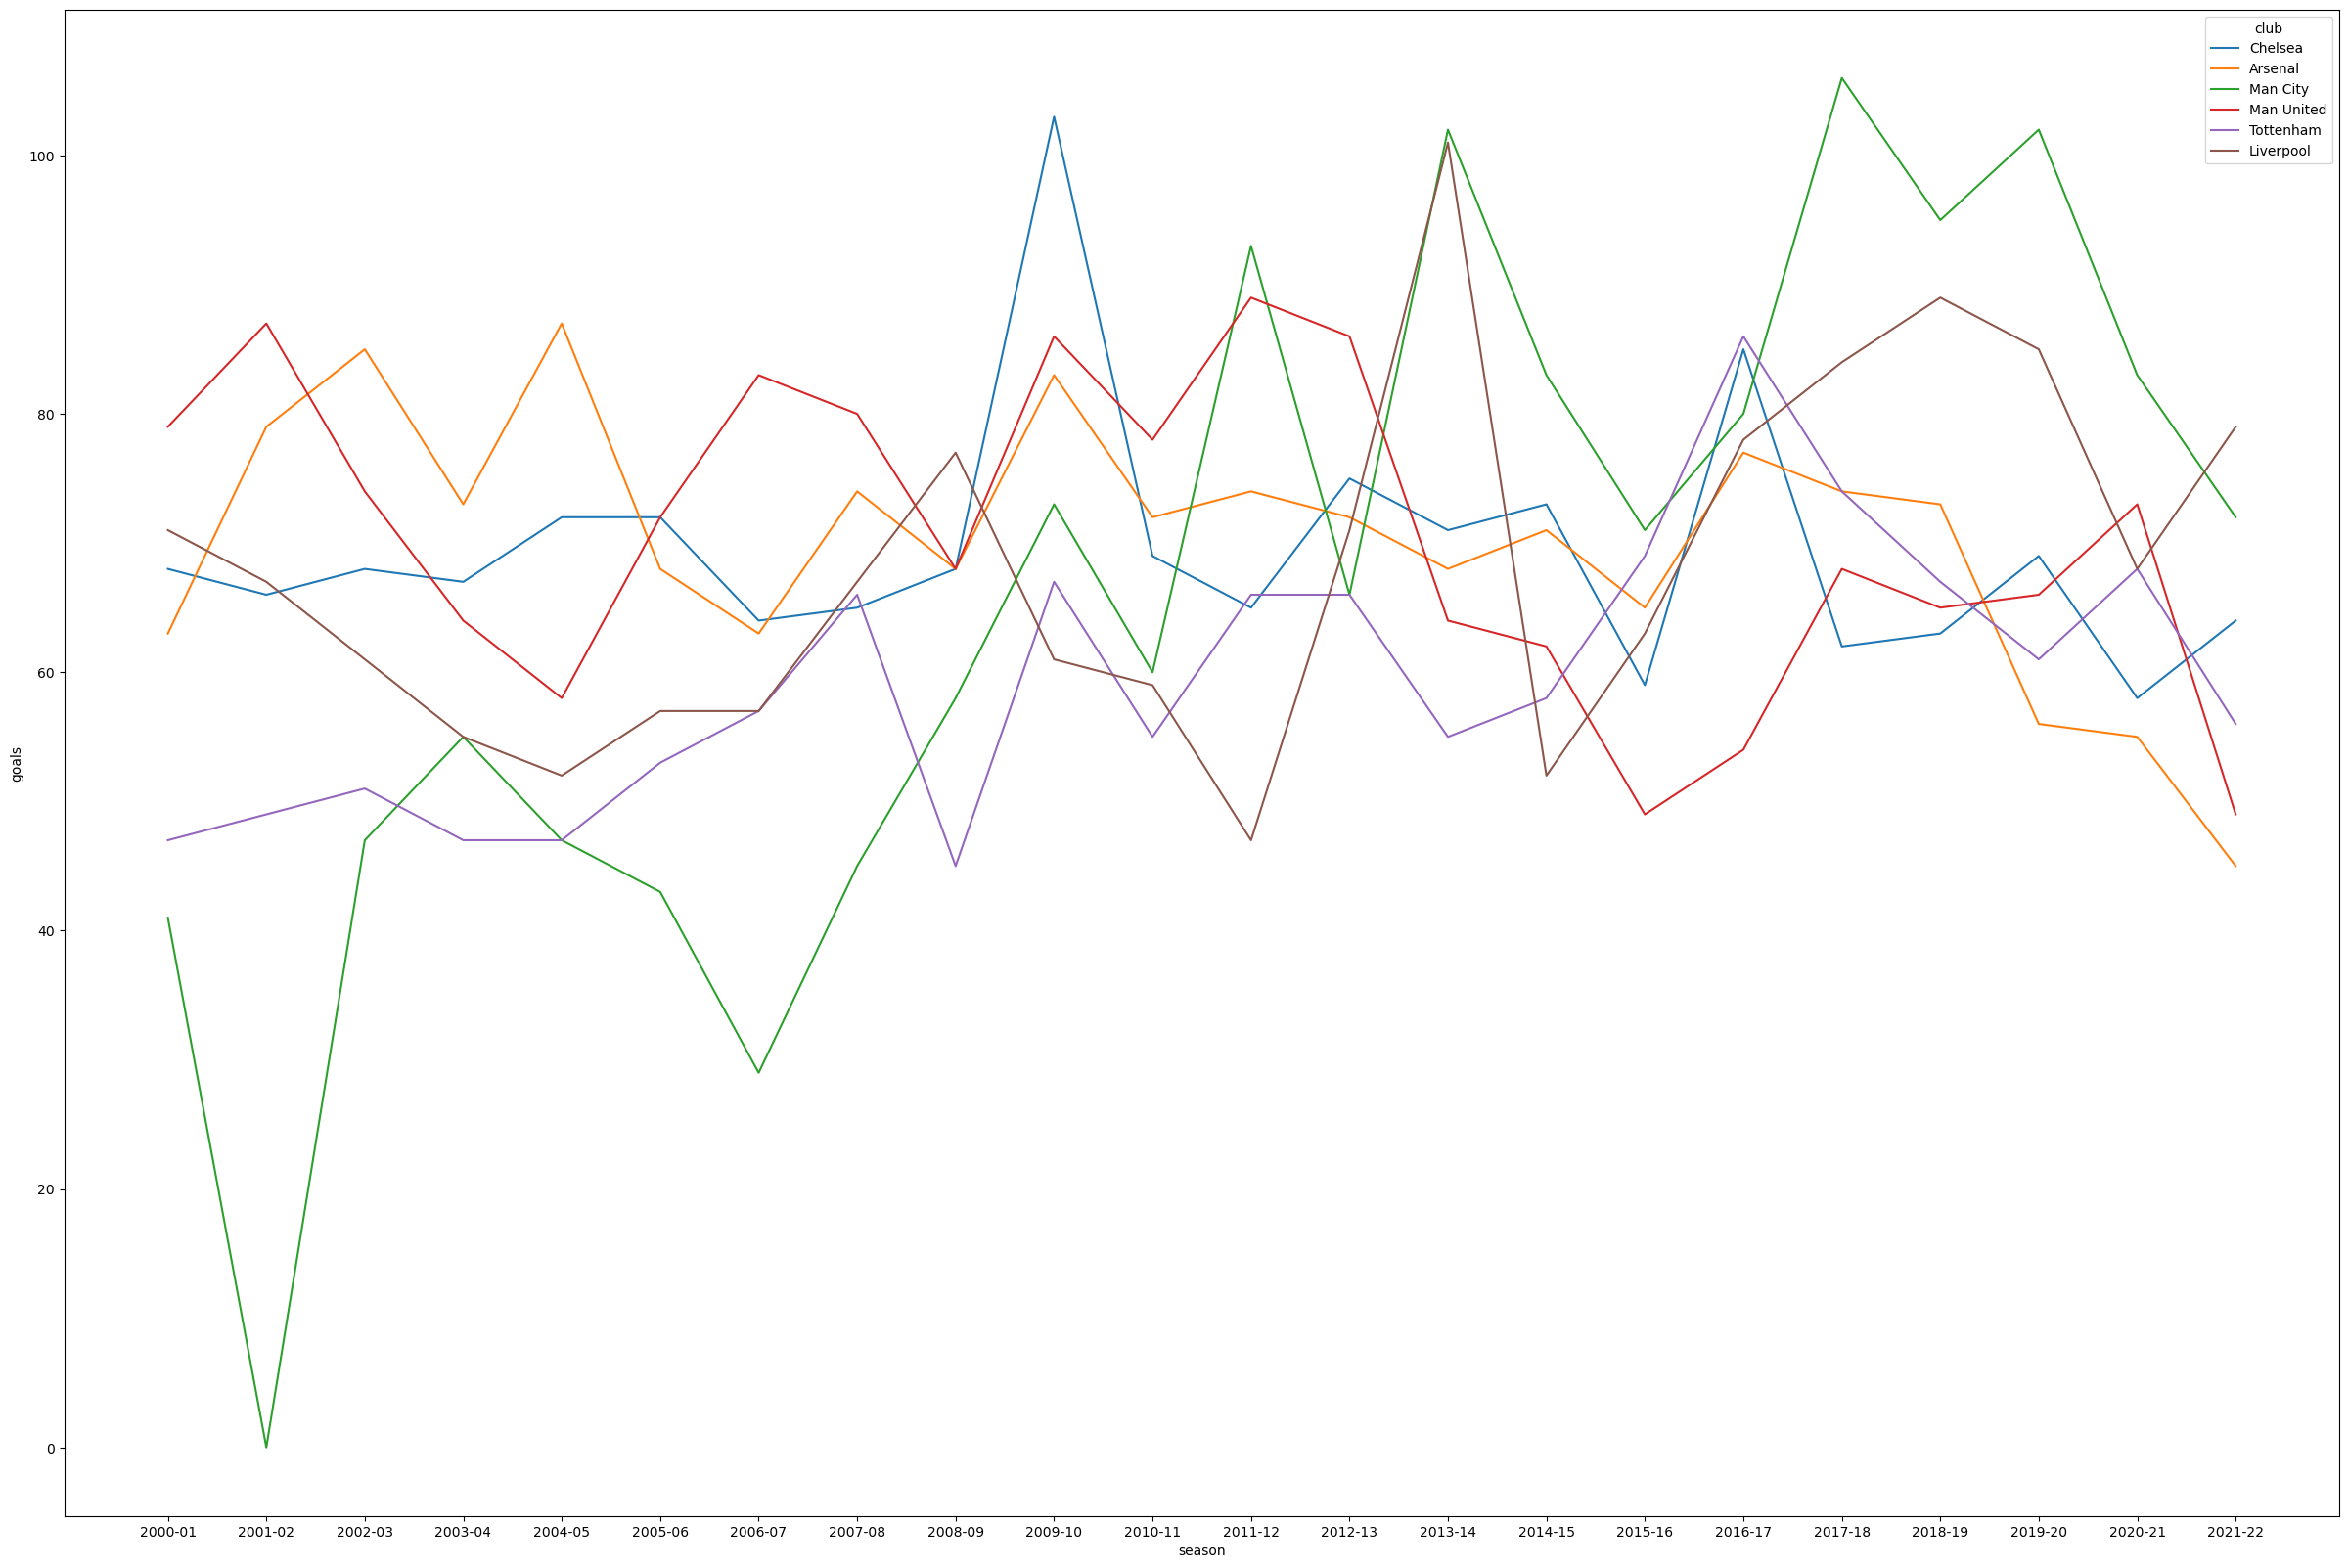

In [6]:
# če bi želeli pogledati vse ekipe, ki so kadarkoli nastopile v PL
# all_clubs = df['HomeTeam'].unique().tolist()
all_clubs = ['Chelsea', 'Arsenal', 'Man City', 'Man United', 'Tottenham', 'Liverpool', ]
seasons = df['Season'].unique().tolist()
df.loc[df['HomeTeam']==all_clubs[1]]['FTHG'].sum() + df.loc[df['AwayTeam']==all_clubs[1]]['FTAG'].sum()

data = []
for season in seasons:
    for club in all_clubs:
        mask = (df['Season'] == season) & (df['HomeTeam'] == club)
        if mask.any():
            goals_per_season = df.apply(lambda x: x['FTHG'] if x['Season'] == season and x['HomeTeam'] == club else 0, axis=1).sum() + df.apply(lambda x: x['FTAG'] if x['Season'] == season and x['AwayTeam'] == club else 0, axis=1).sum()
        else:
            goals_per_season = 0
        data.append([season, club, goals_per_season])

season_club_goals = pd.DataFrame(data, columns=['season', 'club', 'goals'])

plt.figure(figsize=(30,20))
sns.lineplot(data=season_club_goals, x="season", y="goals", hue="club",legend="full")

Iz osnovne množice za vizualizacijo, predstavitev in primerjavo izračunam ključne reprezentativne podatke na manjši množici.

Preprosta statistika za vsak klub za obdobje zadnjih treh let:
goli doseženi doma,
goli doseženi v gosteh,
povprečje golov doma,
povprečje golov v gosteh,
povprečje rumenih kartonov,
povprečje rdečih kartonov,
povprečje kotov,
ofenzivno učinkovitost

In [7]:
df2 = df.loc[df['Season']>='2019-20']
clubs = df2['HomeTeam'].unique().tolist()

statistics_columns = ['club', 'goals_home', 'goals_away', 'avg_goals_home', 'avg_goals_away', 'avg_yellow', 'avg_red', 'avg_corners','offensive_efficiency']
clubs_statistics = []
for club in clubs:
    home = df2.loc[df['HomeTeam']==club]
    away = df2.loc[df['AwayTeam']==club]
    home_games = home.shape[0]
    away_games = away.shape[0]
    goals_home = home['FTHG'].sum()
    goals_away = away['FTAG'].sum()
    avg_goals_home = goals_home / home_games
    avg_goals_away = goals_away / away_games
    avg_yellow = (home['HY'].sum() + away['AY'].sum()) / (home_games + away_games)
    avg_red = (home['HR'].sum() + away['AR'].sum()) / (home_games + away_games)
    avg_corners = (home['HC'].sum() + away['AC'].sum()) / (home_games + away_games)
    offensive_efficiency = (home['HS'].sum() + away['AS'].sum()) / (home['HST'].sum() + away['AST'].sum())

    clubs_statistics.append([club, goals_home, goals_away, avg_goals_home, avg_goals_away, avg_yellow, avg_red, avg_corners,offensive_efficiency])

df_statistics = pd.DataFrame(clubs_statistics, columns=statistics_columns)

Za lažje razumevanje angleške prve lige izpišemo podatke.

In [8]:
df_statistics

,club,goals_home,goals_away,avg_goals_home,avg_goals_away,avg_yellow,avg_red,avg_corners,offensive_efficiency
0,Liverpool,120,112,2.264151,2.074074,1.102804,0.018692,6.971963,2.696970
1,West Ham,91,71,1.685185,1.314815,1.370370,0.055556,4.787037,2.709052
2,Bournemouth,22,18,1.157895,0.947368,1.921053,0.078947,5.105263,3.214876
3,Burnley,51,50,0.962264,0.943396,1.594340,0.009434,4.566038,3.048023
4,Crystal Palace,60,55,1.111111,1.037736,1.551402,0.046729,4.345794,2.882192
5,Watford,36,29,1.058824,0.828571,1.840580,0.072464,4.318841,3.255411
6,Tottenham,102,83,1.924528,1.537037,1.766355,0.056075,4.925234,2.593561
7,Leicester,95,85,1.792453,1.634615,1.342857,0.038095,5.523810,2.704365
8,Newcastle,67,51,1.264151,0.944444,1.831776,0.065421,4.186916,2.997423
9,Man United,103,85,1.907407,1.603774,1.850467,0.028037,5.308411,2.566038


Funkcija za izrisovanje primerjalnega grafa.

In [9]:
def side_by_side_graph(first_col, second_col, label_x, label_y):
    plt.figure(figsize=(20,10))
    bar_width = 0.3

    home = df_statistics[first_col].tolist()
    away = df_statistics[second_col].tolist()

    br1 = np.arange(len(home))
    br2 = [x + bar_width for x in br1]

    plt.bar(br1, home, color ='blue', width = bar_width, label ='home')
    plt.bar(br2, away, color ='grey', width = bar_width, label ='away')

    plt.xlabel(label_x, fontsize = 15)
    plt.ylabel(label_y, fontsize = 15)
    plt.xticks([r + bar_width for r in range(len(home))], clubs)
    plt.tick_params(axis='x', rotation=-60)

    plt.legend()
    plt.show()

Izrišemo grafa za število golov, povprečno število golov za vsak klub.

Na grafu se jasno vidi, da dve ekipi izstopata, to sta: Liverpool, Manchester City.
Blizu so si: Tottenham, Leicester, Manchester United, Chelsea.

Vidi se, da so si stolpci podobni. Vse to govori v korist konkurenčnosti in atraktivnosti angleške prve lige.
<i>
Aktualni podatki o zmagovalcu PL:
2019/20: Liverpool
2020/21: Manchester City FC
2021/22: Manchester City FC
2022/23, (1.1.2023): Arsenal FC
</i>

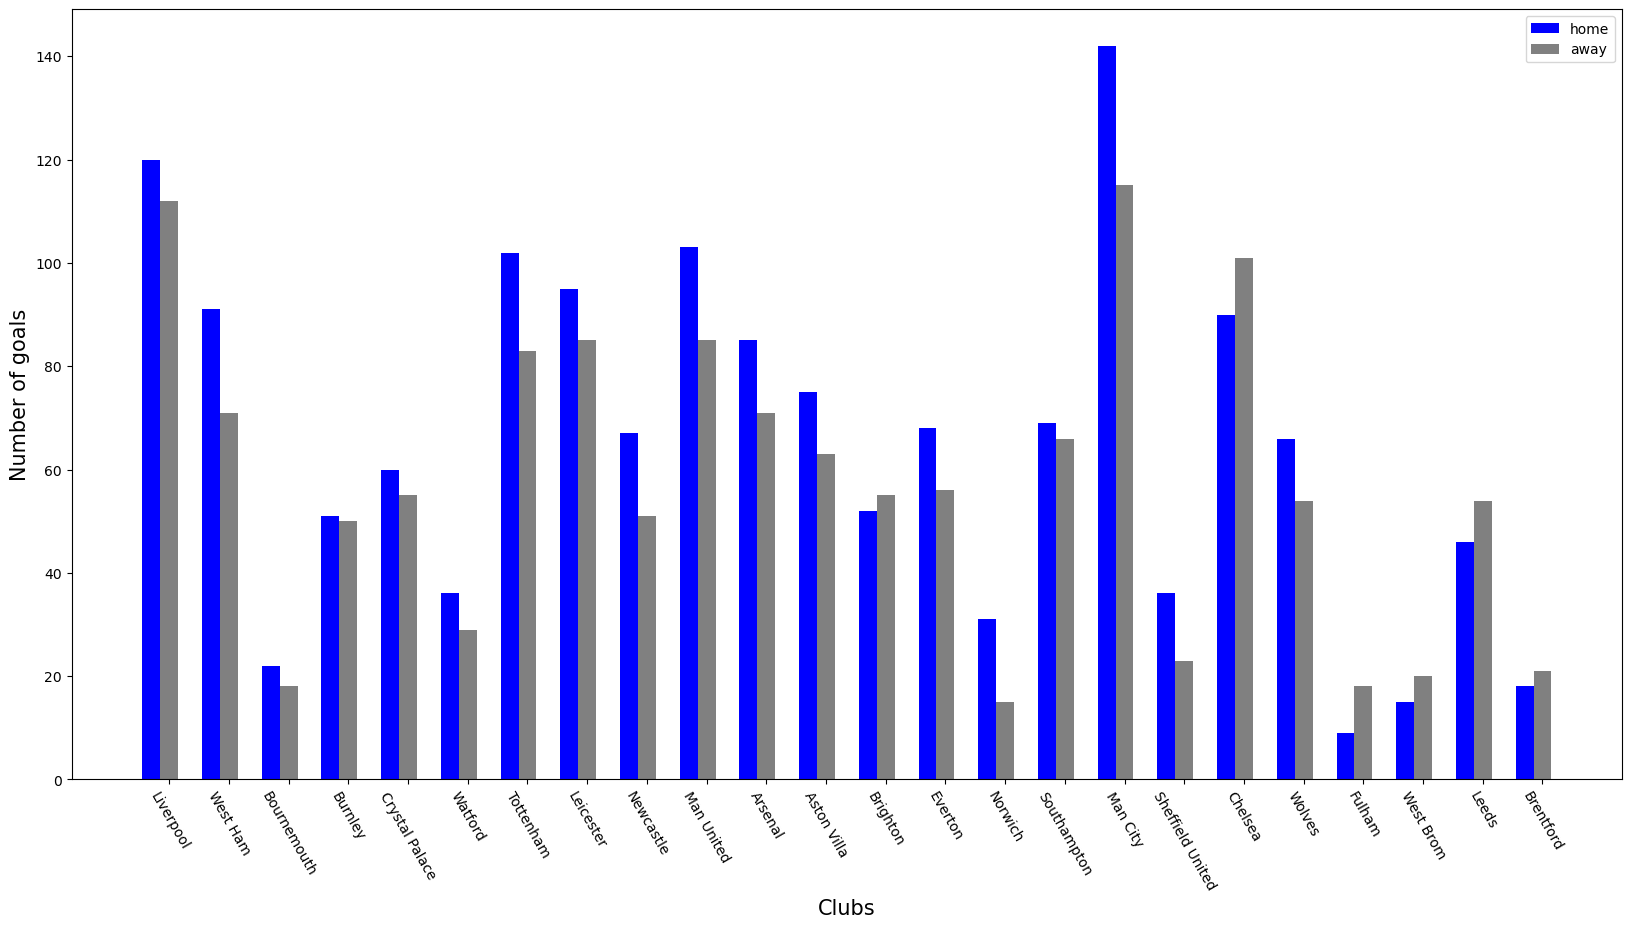

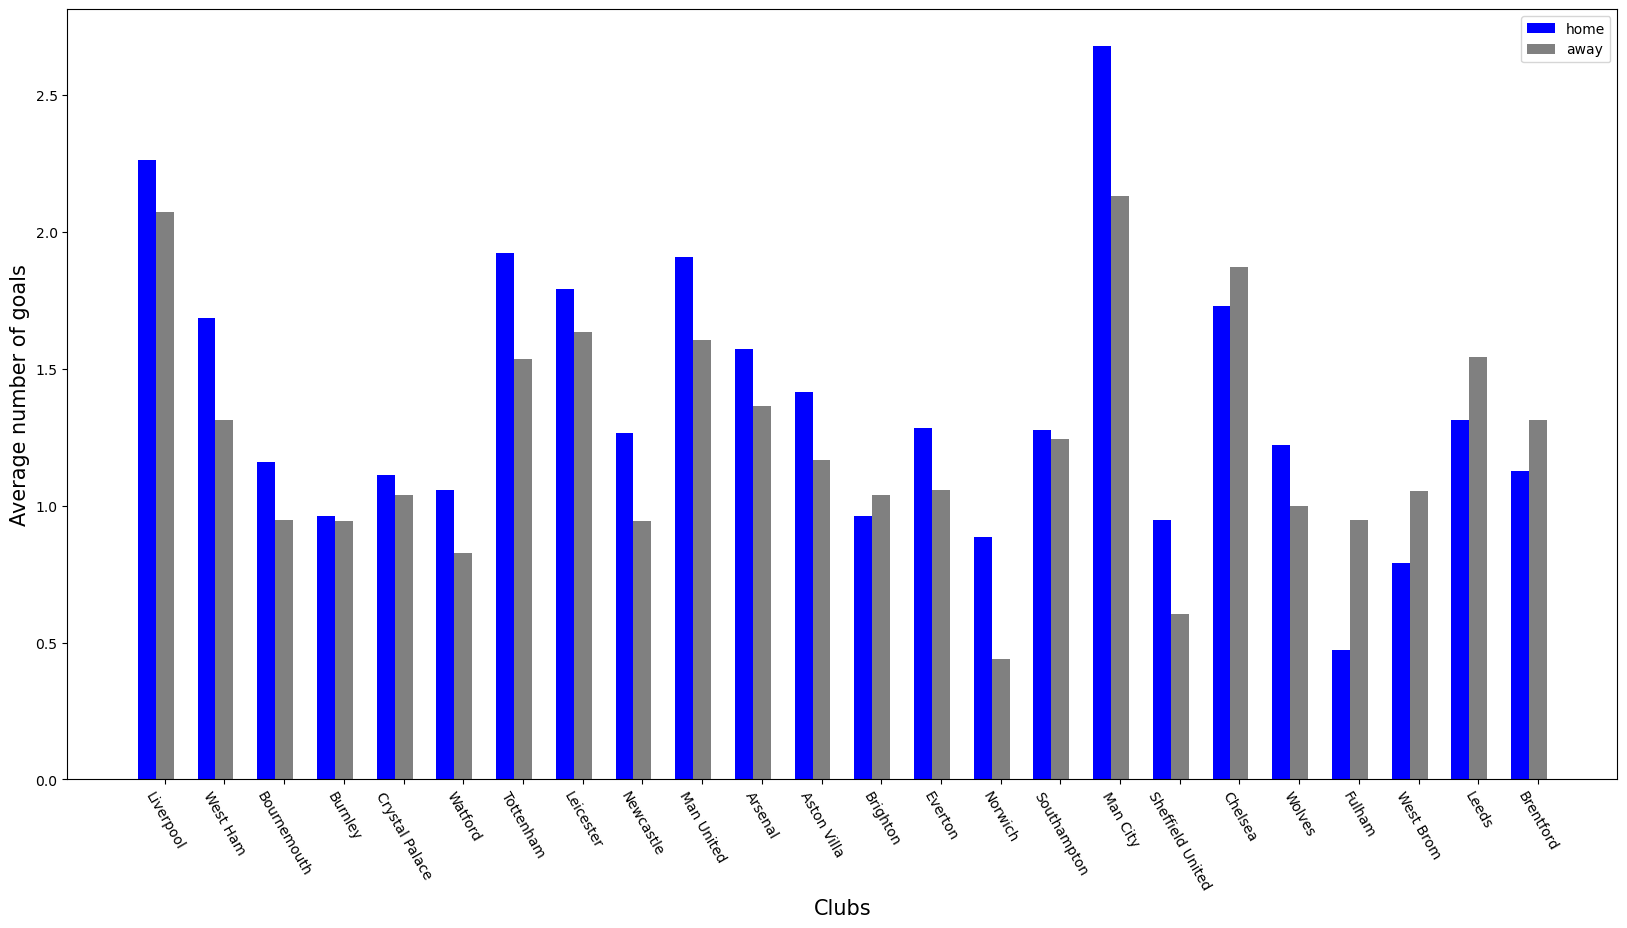

In [10]:
side_by_side_graph('goals_home', 'goals_away', 'Clubs', 'Number of goals')
side_by_side_graph('avg_goals_home', 'avg_goals_away', 'Clubs', 'Average number of goals')

Z grafom raztrosa lako prikažemo razmerje med povprečnim številom rumenih in povprečnim številom rdečih kartonov.
Točke, ki so visoko in daleč desno so ekipe z veliko prekrši. Nasprotno točke spodaj levo predstavljajo fairplay ekipe.

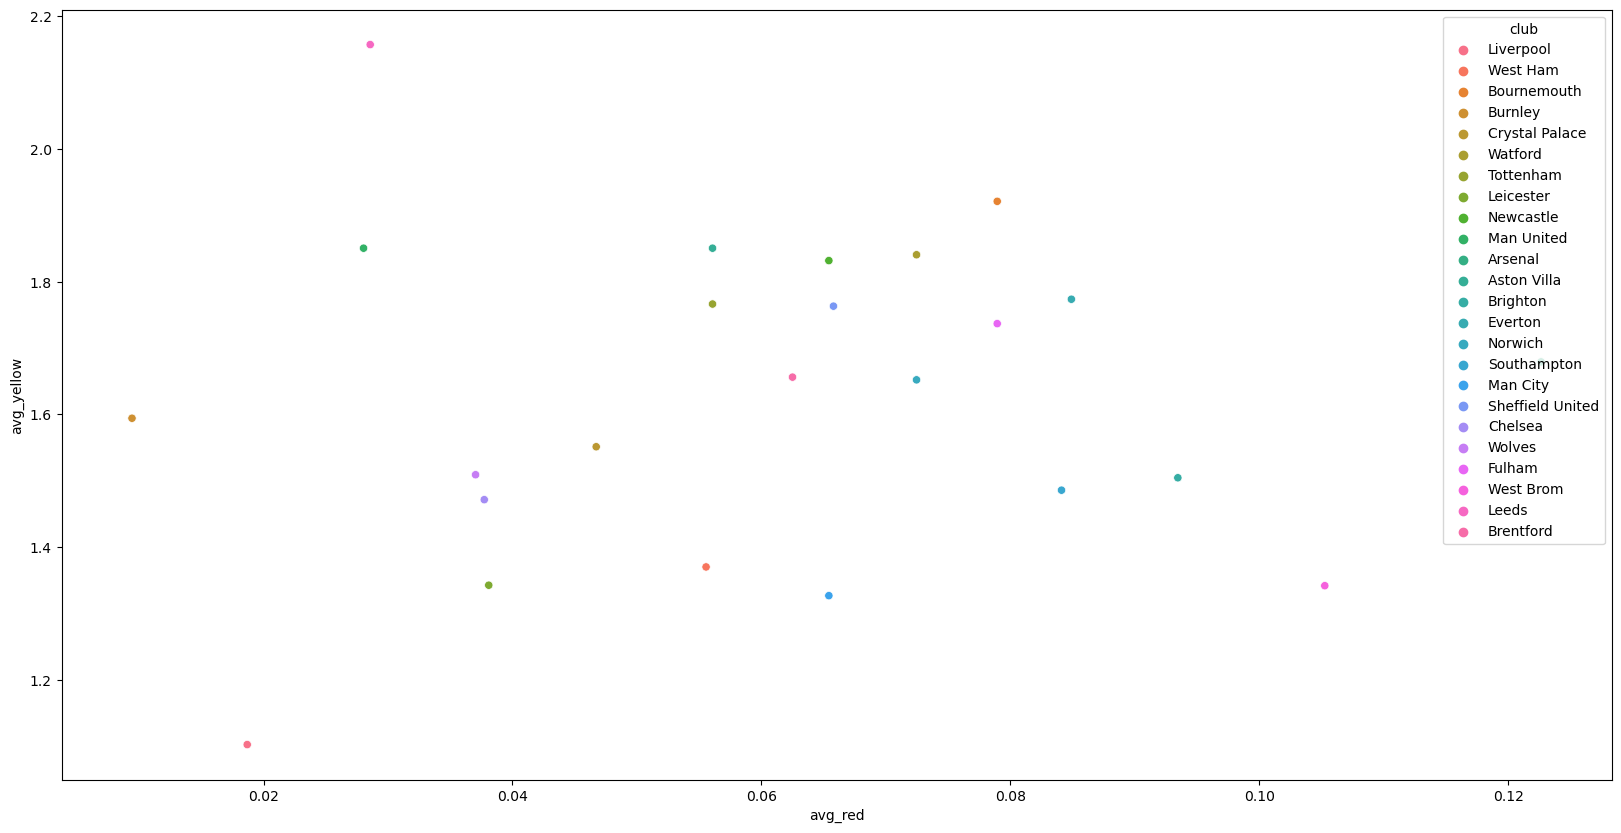

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_statistics, x="avg_red", y="avg_yellow", hue='club')
plt.show()

Numerične podatke za boljše napovedovanje standardiziram.

In [12]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('FTR')

df[numeric_columns] = StandardScaler().fit_transform(df[numeric_columns])

df2 = df.loc[df['Season']>='2019-20']

Izberem kategorične podatke in jih pretvorim v dummies.
Stolpec sodnik je zanimiv podatek, sodniki s svojimi odločitvami močno vpliva na potek igre posledično tudi rezultat. Čeprav se to vedno bolj spreminja, predvsem z uvedbo VAR(video sodnika) in drugih tehnologij.
V daljši množici sodnika ne moremo uporabiti, ker se jih je zamenjalo preveliko število.
Uporabil pa ga bom pri krajši množici, ker se v zadnjih treh letih zamenjalo zelo malo sodnikov, večina je standardnih.
V PL je v vsaki sezoni 20 sodnikov.

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print('Sodniki v zadnjih treh letih:', len(df2['Referee'].unique().tolist()))

# odstanim sezono in čas
categorical_columns.remove('Season')
categorical_columns.remove('DateTime')

# dummies nad df2
df2 = pd.get_dummies(df2, columns=categorical_columns)

# odstanim sodnika
categorical_columns.remove('Referee')

# dummies nad df
df = pd.get_dummies(df, columns=categorical_columns)

['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'HTR', 'Referee', 'MatchDay']
Sodniki v zadnjih treh letih: 27


Tukaj bomo izbrali vse stolpce, ki jih bomo uporabili med strojnim učenjem.

In [14]:
selected_columns = df.columns.tolist()
selected_columns.remove('DateTime')
selected_columns.remove('FTAG')
selected_columns.remove('FTHG')
selected_columns.remove('Season')
selected_columns.remove('Referee')

input_data, predstavlja vhodne stolpce množice
output_data, predstavlja izhodni razred

In [15]:
input_data = selected_columns
output_data = selected_columns[0]
input_data.remove(output_data)

Ponovimo postopek za drugo/manjšo množico.

In [16]:
selected_columns = df2.columns.tolist()
selected_columns.remove('DateTime')
selected_columns.remove('FTAG')
selected_columns.remove('FTHG')
selected_columns.remove('Season')

Določimo vhodne stolpce in izhodni razred druge množice

In [17]:
input_data2 = selected_columns
output_data2 = selected_columns[0]
input_data2.remove(output_data2)

## Strojno učenje

Funkcija za izvedbo klasifikacije.

Množico razdelimo na učno(70%) in testno(30%). Izvedemo klasifikacijo z odločitvenim drevesom.
Ker je enostavna za razumevanje in interpretacijo in lahko obdelujejo velik podatkovni nabor z več značilnostmi.
Prav tako je precej odporna na šum in manjkajoče podatke ter ne zahteva skaliranja podatkov.

Izpišemo točnost napovedi ter preciznost, priklic in f-mero za vsak razred.

In [18]:
def dtc(df_input, df_output):
    x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.3, random_state=789)
    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print('                2          0             1')
    print('Precision:', metrics.precision_score(y_test, y_pred, average=None)) # Za vsak razred izpiše precision
    print('Recall:', metrics.recall_score(y_test, y_pred, average=None)) # Za vsak razred izpiše recall
    print('F1-score:', metrics.f1_score(y_test, y_pred, average=None)) # Za vsak razred izpiše F1-score

Izvedemo klasifikacijo nad prvo množico.

In [19]:
dtc(df[input_data], df[output_data])

Accuracy: 0.5705669481302774
                2          0             1
Precision: [0.61444142 0.33172303 0.67314488]
Recall: [0.58723958 0.34915254 0.67493357]
F1-score: [0.60053262 0.3402147  0.67403804]


Izvedemo klasifikacijo nad drugo množico.

In [20]:
dtc(df2[input_data2], df2[output_data2])

Accuracy: 0.5825545171339563
                2          0             1
Precision: [0.67521368 0.33333333 0.68421053]
Recall: [0.70535714 0.40540541 0.57777778]
F1-score: [0.68995633 0.36585366 0.62650602]


Za primerjavo rezultatov izvedem še druge metode klasifikacije. Primerjali bomo točnost napovednega modela.
Funkcija za izvedbo različnih metod klasifikacije, vrne nam nov dataframe, ki ga uporabimo za grafično predstavitev rezultatov.

In [21]:
def try_clf(df_input, df_output):
    classifiers = [
        DecisionTreeClassifier(),
        LogisticRegression(max_iter=10000),
        LinearSVC(),
        GaussianNB(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier()
    ]

    results = []
    for classifier in classifiers:
        k_fold = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
        cv_results = cross_val_score(classifier,
                                    df_input,
                                    df_output,
                                    cv=k_fold,
                                    scoring='accuracy'
                                    )
        results.append([type(classifier).__name__, abs(cv_results.mean())])

    return pd.DataFrame(results, columns=['name', 'accuracy'])

clf_results = try_clf(df[input_data], df[output_data])
clf_results2 = try_clf(df2[input_data2], df2[output_data2])

def display_results(data):
    plt.figure(figsize=(20,10))
    plot = sns.barplot(data=data, x="name", y="accuracy")
    plot.tick_params(axis='x', rotation=-60)
    plot.set_ylim(0, 1)
    plt.show()

/Users/gregorsulcer/.conda/envs/projektTZ/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/projektTZ/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/projektTZ/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/projektTZ/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/projektTZ/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Izpišemo rezultate, ki smo jih dobili nad prvo množico.

Izrišemo graf, ki predstavlja primerjavo glede na točnost posameznih metod klasifikacije nad prvo množico.

                         name  accuracy
0      DecisionTreeClassifier  0.557003
1          LogisticRegression  0.649295
2                   LinearSVC  0.649898
3                  GaussianNB  0.532634
4      RandomForestClassifier  0.643142
5        ExtraTreesClassifier  0.637954
6          AdaBoostClassifier  0.643021
7  GradientBoostingClassifier  0.648087


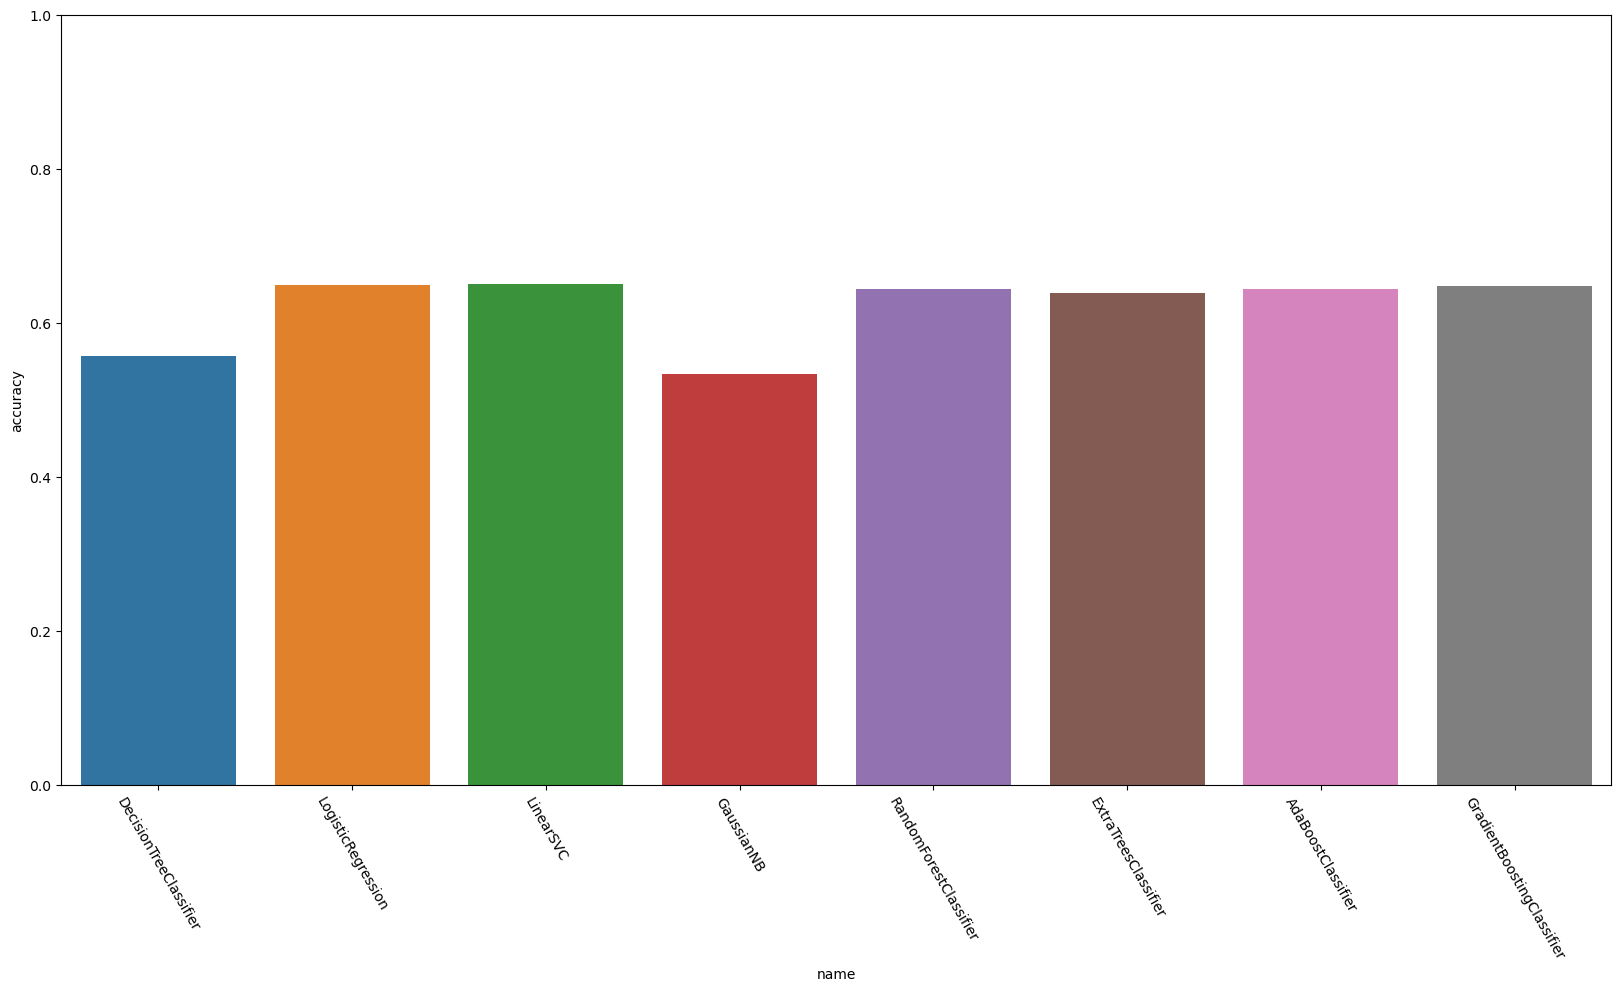

In [22]:
print(clf_results)
display_results(clf_results)

Izpišemo rezultate, ki smo jih dobili nad prvo množico.

Izrišemo graf, ki predstavlja primerjavo glede na točnost posameznih metod klasifikacije nad prvo množico.

                         name  accuracy
0      DecisionTreeClassifier  0.557580
1          LogisticRegression  0.650143
2                   LinearSVC  0.648269
3                  GaussianNB  0.520982
4      RandomForestClassifier  0.653934
5        ExtraTreesClassifier  0.639853
6          AdaBoostClassifier  0.613676
7  GradientBoostingClassifier  0.654842


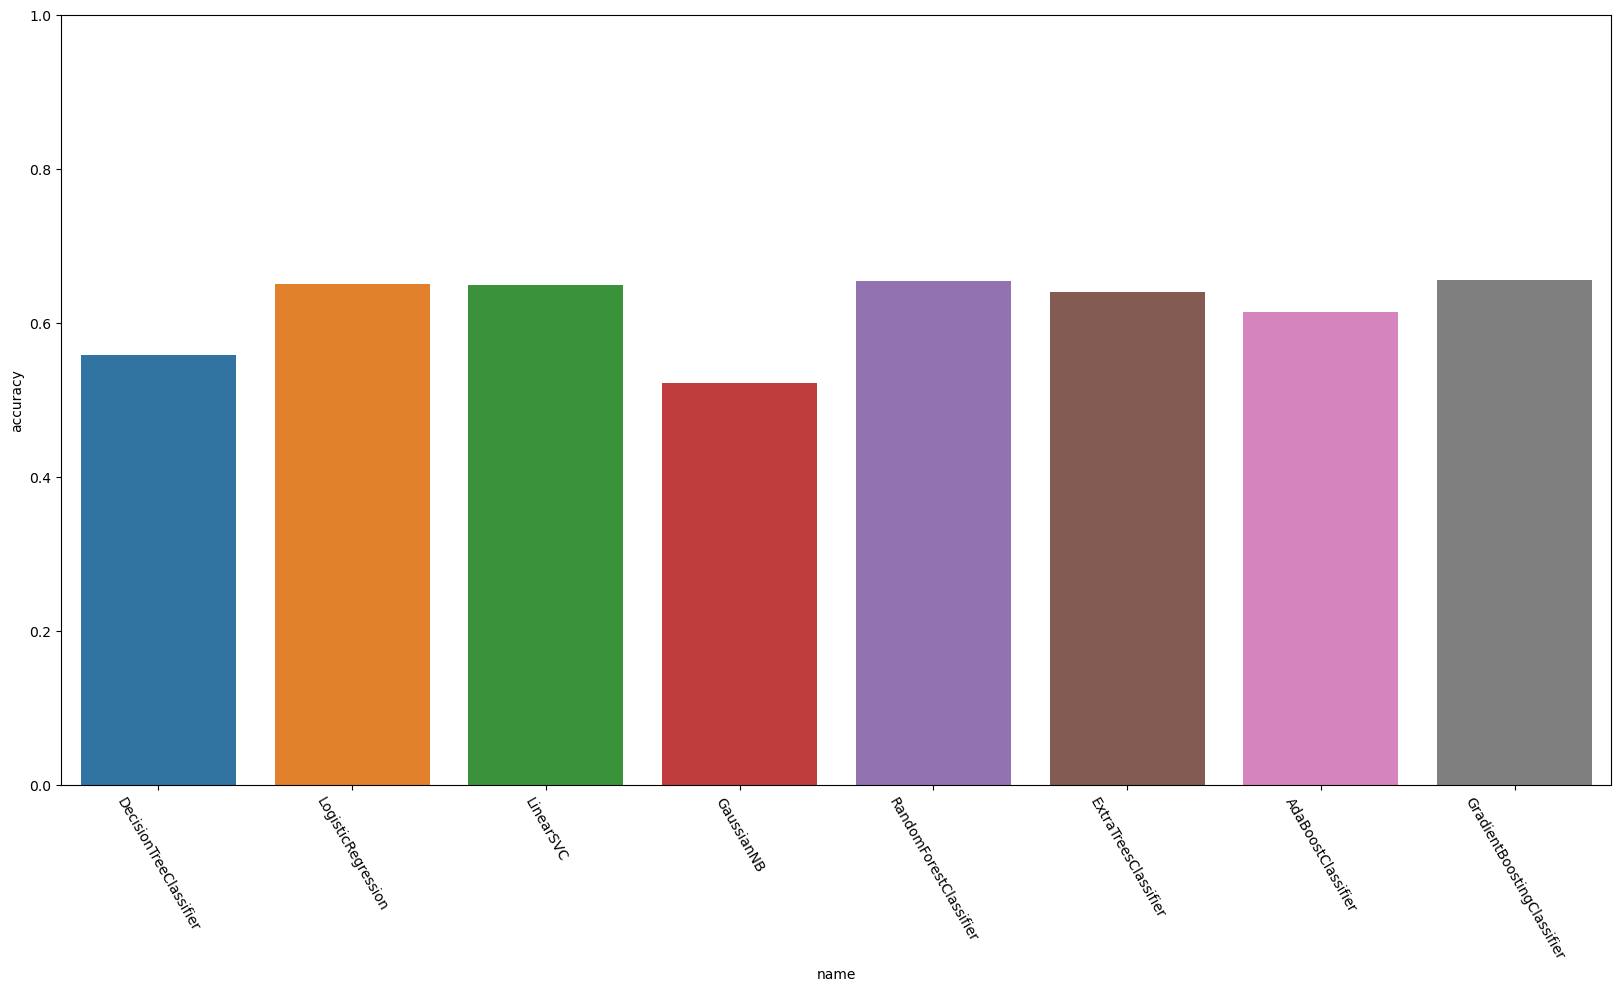

In [23]:
print(clf_results2)
display_results(clf_results2)

## Rezultati in ugotovitve

Točnost klasifikacije se giblje med 55 in 65 odstotki. Boljše rezultate sem dobil pri ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier.
Najboljša točnost je pri GradientBoostingClassifier.

Iz obeh grafov točnosti izberemo, da klasifikacija ni bila tako dobra na množici daljšega časovnega obdobja. Pri daljši množici so klasifikacije glede točnosti zelo podobne, dobre klasifikacije imajo majhne razlike v točnosti.
Pri klasifikaciji nad manjšo množico pa se tudi na grafu opazijo razlike v točnosti. Rezultati nad krajšo množico so v povprečju bolj natančni.

To potrdi tezo, da se nogomet hitro spreminja in da je uporaba dolgih časovnih obdobji manj primerna izbira. Napovedovanje nogometnih rezultatov je zahtevna naloga, prav zaradi podatkov. Obstaja neskončno število potencialnih meritev, za katere je mogoče dokazati, da vplivajo na nogometne tekme.

V realnem pogledu je "dobrih" podatkov malo, nogomet se igra povsod po svetu, vendar se sčasoma zelo hitro spreminja, strategije in dejavniki, ki so pomembni v določeni generaciji ali regiji, morda niso niti približno tako pomembni v drugi – te spremembe so zelo nepredvidljive in zmanjšujejo zanesljivost na velike vzorce.

Točnost modelov je uporabna. Vsak model, ki ima točnost nad 50% lahko pomaga pri izbiri rezultata. Boljši klasifikatorji so v povprečju dosegali rezultate nad 60%. S temi modeli si lahko pomagamo pri napovedovanju, prav bi nam lahko prišli, če bi naredili analizo celotne lige v preteklih nekaj letih in podrobno analizirali klube, igralce, prestope, trenerje, sodnike in s pomočjo teh napovedovali neko predvideno statistiko nogometnih obračunov.
Če bi si ustvarili primerno množico bi jo lahko uporabili nad tem modelom.